# Flights Data Exploration Challenge

Dans ce défi, vous explorerez un ensemble de données du monde réel contenant des données de vols du département américain des transports.

Commençons par charger et visualiser les données.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


L'ensemble de données contient des observations de vols intérieurs aux États-Unis en 2013 et se compose des champs suivants :

- **Année** : L'année du vol (tous les enregistrements datent de 2013)
- **Mois** : Le mois du vol
- **JourduMois** : Le jour du mois où le vol a décollé
- **DayOfWeek** : Le jour de la semaine où le vol a décollé - de 1 (lundi) à 7 (dimanche)
- **Transporteur** : l'abréviation à deux lettres de la compagnie aérienne.
- **OriginAirportID** : un identifiant numérique unique pour l'aéroport de départ
- **OriginAirportName** : Le nom complet de l'aéroport de départ
- **OriginCity** : La ville de l'aéroport de départ
- **OriginState** : l'état de l'aéroport de départ
- **DestAirportID** : Un identifiant numérique unique pour l'aéroport de destination
- **DestAirportName** : Le nom complet de l'aéroport de destination
- **DestCity** : La ville de l'aéroport de destination
- **DestState** : l'état de l'aéroport de destination
- **CRSDepTime** : L'heure de départ prévue
- **DepDelay** : Le nombre de minutes de départ a été retardé (le vol qui est parti en avance sur l'horaire a une valeur négative)
- **DelDelay15** : Un indicateur binaire indiquant que le départ a été retardé de plus de 15 minutes (et donc considéré comme "en retard")
- **CRSArrTime** : L'heure d'arrivée prévue
- **ArrDelay** : Le nombre de minutes d'arrivée a été retardé (le vol qui est arrivé en avance sur l'horaire a une valeur négative)
- **ArrDelay15** : Un indicateur binaire indiquant que l'arrivée a été retardée de plus de 15 minutes (et donc considérée comme "en retard")
- **Annulé** : un indicateur binaire indiquant que le vol a été annulé

Votre défi consiste à explorer les données de vol pour analyser les facteurs possibles qui affectent les retards au départ ou à l'arrivée d'un vol.

1. Commencez par nettoyer les données.
    - Identifiez toute donnée nulle ou manquante et imputez les valeurs de remplacement appropriées.
    - Identifiez et éliminez les valeurs aberrantes dans les colonnes **DepDelay** et **ArrDelay**.
2. Explorez les données nettoyées.
    - Afficher les statistiques récapitulatives pour les champs numériques de l'ensemble de données.
    - Déterminer la distribution des colonnes **DepDelay** et **ArrDelay**.
    - Utilisez des statistiques, des fonctions d'agrégation et des visualisations pour répondre aux questions suivantes :
        - *Quels sont les retards moyens au départ et à l'arrivée ?*
        - *Comment les transporteurs se comparent-ils en termes de performances de retard à l'arrivée ?*
        - *Y a-t-il une différence notable dans les retards d'arrivée pour les différents jours de la semaine ?*
        - *Quel aéroport de départ a le retard de départ moyen le plus élevé ?*
        - *Les départs **tardifs** ont-ils tendance à entraîner des retards d'arrivée plus longs que les départs à l'heure ?*
        - *Quel itinéraire (de l'aéroport d'origine à l'aéroport de destination) a le plus d'arrivées **tardives** ?*
        - * Quel itinéraire a le retard d'arrivée moyen le plus élevé ?*
        
Ajoutez des cellules de code selon les besoins pour créer votre solution.

> **Remarque** : Il n'existe pas de solution "correcte" unique.

# 1 - EDA

In [4]:
df_flights.shape

(271940, 20)

In [3]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [5]:
df_flights.isnull().sum() / 271940

Year                 0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
Carrier              0.000000
OriginAirportID      0.000000
OriginAirportName    0.000000
OriginCity           0.000000
OriginState          0.000000
DestAirportID        0.000000
DestAirportName      0.000000
DestCity             0.000000
DestState            0.000000
CRSDepTime           0.000000
DepDelay             0.000000
DepDel15             0.010153
CRSArrTime           0.000000
ArrDelay             0.000000
ArrDel15             0.000000
Cancelled            0.000000
dtype: float64

In [6]:
df_flights['DepDel15'].value_counts()

0.0    215038
1.0     54141
Name: DepDel15, dtype: int64

In [7]:
df_flights[['DepDelay', 'ArrDelay']].describe()

,DepDelay,ArrDelay
count,271940.000000,271940.000000
mean,10.350449,6.496650
std,35.673710,38.230331
min,-63.000000,-75.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,10.000000
max,1425.000000,1440.000000


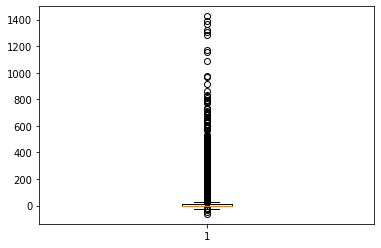

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(df_flights['DepDelay'])
plt.show()

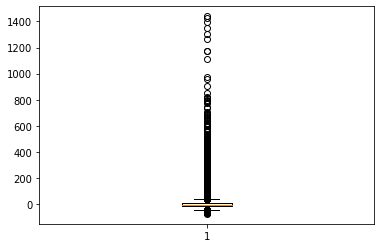

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(df_flights['ArrDelay'])
plt.show()

In [50]:
quantile_inf = df_flights['DepDelay'].quantile(0.01)
quantile_sup = df_flights['DepDelay'].quantile(0.90)

In [51]:
quantile_inf_2 = df_flights['ArrDelay'].quantile(0.01)
quantile_sup_2 = df_flights['ArrDelay'].quantile(0.90)

In [52]:
df = df_flights[
    (df_flights['ArrDelay'] > quantile_inf_2) & (df_flights['ArrDelay'] < quantile_sup_2)
    &
    (df_flights['DepDelay'] > quantile_inf) & (df_flights['DepDelay'] < quantile_sup)
]

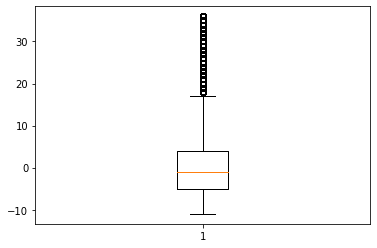

In [53]:
plt.boxplot(df['DepDelay'])
plt.show()

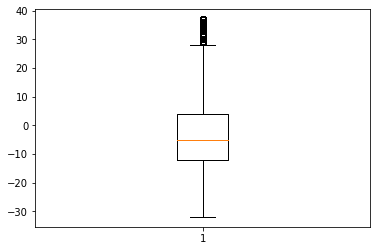

In [54]:
plt.boxplot(df['ArrDelay'])
plt.show()

In [55]:
df.shape

(234802, 20)

In [56]:
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [57]:
df['DepDel15'].value_counts()

0.0    207752
1.0     24289
Name: DepDel15, dtype: int64

In [58]:
df = df.fillna(value=0.0)

In [59]:
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

# 2 . EXploration

In [60]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,234802.0,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000
mean,2013.0,7.012951,15.810819,3.902309,12751.998284,12735.984404,1297.782046,1.288417,0.103445,1479.238690,-3.103666,0.116243,0.012155
std,0.0,1.999885,8.838329,1.993400,1508.571872,1506.084054,469.718843,9.153171,0.304539,488.477765,12.946277,0.320516,0.109578
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-5.000000,0.000000,1105.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1255.000000,-1.000000,0.000000,1500.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1705.000000,4.000000,0.000000,1900.000000,4.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


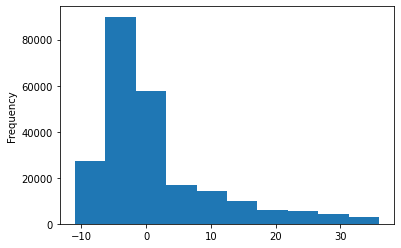

In [62]:
df['DepDelay'].plot(kind='hist')
plt.show()

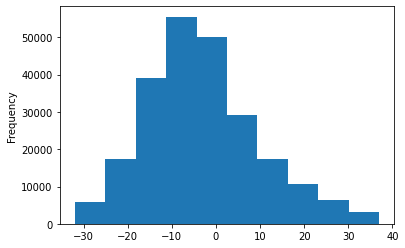

In [63]:
df['ArrDelay'].plot(kind='hist')
plt.show()

# Q1

In [64]:
df[['DepDelay', 'ArrDelay']].mean()

DepDelay    1.288417
ArrDelay   -3.103666
dtype: float64

# Q2

In [66]:
df[['DepDelay', 'ArrDelay', 'Carrier']].groupby(by='Carrier').mean().sort_values(by='DepDelay')

,DepDelay,ArrDelay
Carrier,,
HA,-2.331828,-1.753950
AS,-2.085376,-2.779544
9E,-1.183773,-6.071124
US,-1.167277,-2.836717
YV,-0.823834,-2.469025
OO,-0.787541,-2.750888
EV,-0.115334,-4.862082
DL,-0.060244,-5.305459
B6,-0.049172,-3.906673


# Q3

In [67]:
df[['DayOfWeek', 'DepDelay']].groupby(by='DayOfWeek').mean()

,DepDelay
DayOfWeek,
1,1.352109
2,0.772424
3,1.064679
4,2.021480
5,1.847148
6,0.766227
7,1.117543


In [68]:
df[['DayOfWeek', 'ArrDelay']].groupby(by='DayOfWeek').mean()

,ArrDelay
DayOfWeek,
1,-3.004444
2,-3.838871
3,-2.852733
4,-1.744286
5,-2.315723
6,-4.609975
7,-3.636915


# Q4 

In [69]:
df[['DepDelay', 'OriginAirportName']].groupby(by='OriginAirportName').mean().sort_values(
    by='DepDelay', ascending=False)

,DepDelay
OriginAirportName,
Chicago Midway International,6.240506
Dallas Love Field,4.947875
William P Hobby,4.945270
Baltimore/Washington International Thurgood Marshall,3.805278
Denver International,3.681906
...,...
Tucson International,-1.372188
Richmond International,-1.609312
Kahului Airport,-1.852998


# Q5

In [70]:
df[['DepDelay','DepDel15', 'ArrDelay']].groupby(by='DepDel15').mean()

,DepDelay,ArrDelay
DepDel15,,
0.0,-1.223943,-5.299464
1.0,23.063074,15.927333


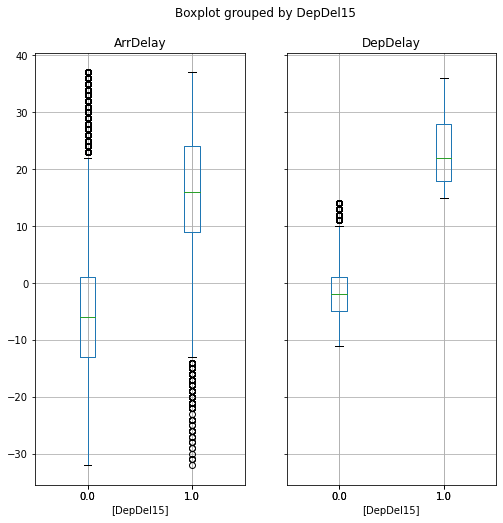

In [71]:
df[['DepDelay', 'ArrDelay', 'DepDel15']].boxplot(by='DepDel15', figsize=(8, 8))
plt.show()

# Q6

In [72]:
df['route'] = df['OriginAirportName'] + '>>' + df['DestAirportName']

In [73]:
df[['ArrDelay', 'route']].groupby(by='route').mean().sort_values(by='ArrDelay', ascending=False)

,ArrDelay
route,
Louis Armstrong New Orleans International>>Ronald Reagan Washington National,25.333333
Cleveland-Hopkins International>>Palm Beach International,18.000000
Denver International>>Raleigh-Durham International,14.153846
Charlotte Douglas International>>General Mitchell International,13.500000
Cleveland-Hopkins International>>Philadelphia International,12.800000
...,...
Lambert-St. Louis International>>Cleveland-Hopkins International,-20.000000
Jacksonville International>>Chicago Midway International,-20.000000
Eppley Airfield>>LaGuardia,-20.750000
